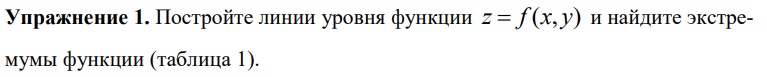

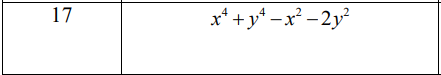

In [1]:
import sympy as sp
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

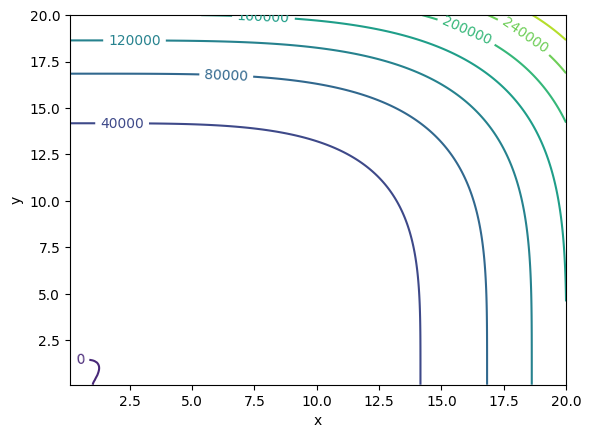

In [3]:
x = np.linspace(0.1, 20, 201)
y = np.linspace(0.1, 20, 201)
X, Y = np.meshgrid(x, y)
Z = X**4+Y**4-X**2-2*Y**2
fig, ax = plt.subplots()
cs = ax.contour(X, Y, Z)
ax.clabel(cs, cs.levels, inline=True, fontsize=10)
plt.xlabel('x'); plt.ylabel('y')
plt.show()

In [3]:
def f(t):
    x, y = t
    return x**4+y**4-x**2-2*y**2
minimum, f_min, _, _, _ = fmin(f, np.array([1, 1]), xtol=1e-9, disp=False, full_output=True)
print('Min:', minimum)
print('f:', f_min)

Min: [0.70710678 1.        ]
f: -1.25


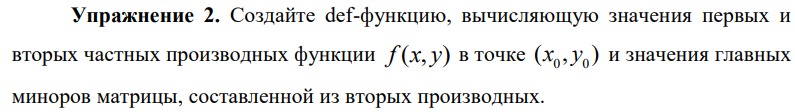

In [4]:
x,y,sdx,sdy,D=sp.symbols('x y sdx sdy D')
def d1(f,x,y,x0,y0):
    f=x**2+y**2-2*sp.log(x)-18*sp.log(y)
    dzdx=sp.diff(f, x)
    dzdy=sp.diff(f, y)
    sp.pprint("dzdx+dzdy")
    D=dzdx+dzdy
    sp.pprint(D)
    a1=D.subs(x,x0)
    a2=a1.subs(y,y0)
    4*x*(x**2-1)
    sp.pprint("dzdx+dzdy in [x0,y0]")
    sp.pprint(a2)
    
def d2(f,x,y,x0,y0):
    f=x**2+y**2-2*sp.log(x)-18*sp.log(y)
    dzdx=sp.diff(f, x)
    dzdy=sp.diff(f, y)
    d2zdx=sp.diff(f, x,2)
    d2zdy=sp.diff(f, y,2)
    prom=sp.diff(dzdx,y)
    D=d2zdx+d2zdy+2*prom*sdx*sdy
    sp.pprint("d2zdx+d2zdy")
    print("\n")
    sp.pprint(D)
    
    a1=D.subs(x,x0)
    a2=a1.subs(y,y0)
    sp.pprint("d2zdx+d2zdy in [x0,y0]")
    sp.pprint(a2)
    print("\n")
    B = sp.Matrix([[d2zdx,-prom], [-prom,d2zdy]])
    print("Matrix:")
    print("\n")
    sp.pprint(B.T)
    print("Minor 1:")
    print("\n")
    sp.pprint(d2zdx)
    print("Minor 2:")
    print("\n")
    sp.pprint(B.det())

d1(f,x,y,2,-1) 
print("\n")
d2(f,x,y,2,-1) 

dzdx+dzdy
            18   2
2⋅x + 2⋅y - ── - ─
            y    x
dzdx+dzdy in [x0,y0]
19


d2zdx+d2zdy


  ⎛    1 ⎞     ⎛    9 ⎞
2⋅⎜1 + ──⎟ + 2⋅⎜1 + ──⎟
  ⎜     2⎟     ⎜     2⎟
  ⎝    x ⎠     ⎝    y ⎠
d2zdx+d2zdy in [x0,y0]
45/2


Matrix:


⎡  ⎛    1 ⎞            ⎤
⎢2⋅⎜1 + ──⎟      0     ⎥
⎢  ⎜     2⎟            ⎥
⎢  ⎝    x ⎠            ⎥
⎢                      ⎥
⎢              ⎛    9 ⎞⎥
⎢    0       2⋅⎜1 + ──⎟⎥
⎢              ⎜     2⎟⎥
⎣              ⎝    y ⎠⎦
Minor 1:


  ⎛    1 ⎞
2⋅⎜1 + ──⎟
  ⎜     2⎟
  ⎝    x ⎠
Minor 2:


    36   4      36 
4 + ── + ── + ─────
     2    2    2  2
    y    x    x ⋅y 


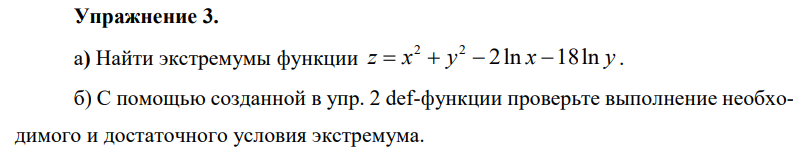

In [8]:
#Необходимое условие
#
#

x,y,sdx,sdy,D=sp.symbols('x y sdx sdy D')

def d1(f,x,y,x0,y0):
    f=x**2+y**2-2*sp.log(x)-18*sp.log(y)
    dzdx=sp.diff(f, x)
    dzdy=sp.diff(f, y)
    sp.pprint("dzdx+dzdy")
    D=dzdx+dzdy
    sp.pprint(D)
    a1=D.subs(x,x0)
    a2=a1.subs(y,y0)
    
    sp.pprint("dzdx+dzdy in [x0,y0]")
    sp.pprint(a2)
    
def d2(f,x,y,x0,y0):
    f=x**2+y**2-2*sp.log(x)-18*sp.log(y)
    dzdx=sp.diff(f, x)
    dzdy=sp.diff(f, y)
    d2zdx=sp.diff(f, x,2)
    d2zdy=sp.diff(f, y,2)
    prom=sp.diff(dzdx,y)
    D=d2zdx+d2zdy+2*prom*sdx*sdy
    sp.pprint("d2zdx+d2zdy")
    print("\n")
    sp.pprint(D)
    
    a1=D.subs(x,x0)
    a2=a1.subs(y,y0)
    sp.pprint("d2zdx+d2zdy in [x0,y0]")
    sp.pprint(a2)
    print("\n")
    B = sp.Matrix([[d2zdx,-prom], [-prom,d2zdy]])
    print("Матрица:")
    print("\n")
    sp.pprint(B.T)
    print("Минор 1:")
    print("\n")
    sp.pprint(d2zdx)
    print("Минор 2:")
    print("\n")
    sp.pprint(B.det())

print("Левее х0")
d1(f,x,y,1-0.01,3-0.01) 
print("\n")
d2(f,x,y,1-0.01,3-0.01) 

d1(f,x,y,1,3) 
print("\n")
d2(f,x,y,1,3) 

print("Правее х0")
d1(f,x,y,1+0.01,3+0.01) 
print("\n")
d2(f,x,y,1+0.01,3+0.01) 

Левее х0
dzdx+dzdy
            18   2
2⋅x + 2⋅y - ── - ─
            y    x
dzdx+dzdy in [x0,y0]
-0.0802689098341265


d2zdx+d2zdy


  ⎛    1 ⎞     ⎛    9 ⎞
2⋅⎜1 + ──⎟ + 2⋅⎜1 + ──⎟
  ⎜     2⎟     ⎜     2⎟
  ⎝    x ⎠     ⎝    y ⎠
d2zdx+d2zdy in [x0,y0]
8.05400839874998


Матрица:


⎡  ⎛    1 ⎞            ⎤
⎢2⋅⎜1 + ──⎟      0     ⎥
⎢  ⎜     2⎟            ⎥
⎢  ⎝    x ⎠            ⎥
⎢                      ⎥
⎢              ⎛    9 ⎞⎥
⎢    0       2⋅⎜1 + ──⎟⎥
⎢              ⎜     2⎟⎥
⎣              ⎝    y ⎠⎦
Минор 1:


  ⎛    1 ⎞
2⋅⎜1 + ──⎟
  ⎜     2⎟
  ⎝    x ⎠
Минор 2:


    36   4      36 
4 + ── + ── + ─────
     2    2    2  2
    y    x    x ⋅y 
dzdx+dzdy
            18   2
2⋅x + 2⋅y - ── - ─
            y    x
dzdx+dzdy in [x0,y0]
0


d2zdx+d2zdy


  ⎛    1 ⎞     ⎛    9 ⎞
2⋅⎜1 + ──⎟ + 2⋅⎜1 + ──⎟
  ⎜     2⎟     ⎜     2⎟
  ⎝    x ⎠     ⎝    y ⎠
d2zdx+d2zdy in [x0,y0]
8


Матрица:


⎡  ⎛    1 ⎞            ⎤
⎢2⋅⎜1 + ──⎟      0     ⎥
⎢  ⎜     2⎟            ⎥
⎢  ⎝    x ⎠            ⎥
⎢      

In [10]:
import sympy as sp
from sympy.abc import x, y, z

ex=sp.solve([x**2+y**2-1, x-y, z-y])
print(ex[0])
print(ex[1])
print('x:', [sp.N(ex[0][x]), sp.N(ex[1][x])])

{x: -sqrt(2)/2, y: -sqrt(2)/2, z: -sqrt(2)/2}
{x: sqrt(2)/2, y: sqrt(2)/2, z: sqrt(2)/2}
x: [-0.707106781186548, 0.707106781186548]


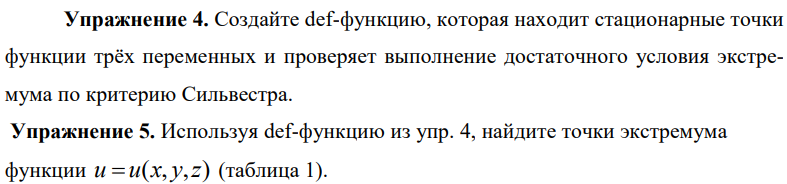

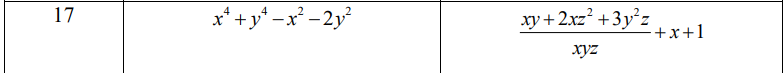

In [16]:
import sympy as sp
from sympy.abc import x, y, z

def extremum(f):
    df1 = sp.diff(f, x)
    df2 = sp.diff(f, y)
    df3 = sp.diff(f, z)
    s = sp.solve([df1, df2, df3])
    print('x:', [sp.N(s[0][x]), sp.N(s[1][x])])
    print('y:', [sp.N(s[0][y]), sp.N(s[1][y])])
    print('z:', [sp.N(s[0][z]), sp.N(s[1][z])])
    
    print('Первая точка: ')
    d2fdx2 = sp.diff(df1, x).subs([(x,-1.56),(y,0.82),(z,-0.64)])
    d2fdy2 = sp.diff(df2, y).subs([(x,-1.56),(y,0.82),(z,-0.64)])
    d2fdz2 = sp.diff(df3, z).subs([(x,-1.56),(y,0.82),(z,-0.64)])
    d2fdxdy = sp.diff(df1, y).subs([(x,-1.56),(y,0.82),(z,-0.64)])
    d2fdzdx = sp.diff(df1, z).subs([(x,-1.56),(y,0.82),(z,-0.64)])
    d2fdydz = sp.diff(df2, z).subs([(x,-1.56),(y,0.82),(z,-0.64)])
    m = [[d2fdx2, d2fdxdy, d2fdzdx], [d2fdxdy, d2fdy2, d2fdydz], [d2fdzdx, d2fdydz, d2fdz2]]
    D = m[0][0]*m[1][1]*m[2][2]+m[0][1]*m[1][2]*m[2][0]+m[0][2]*m[1][0]*m[2][1]-m[0][2]*m[1][1]*m[2][0]-m[0][1]*m[1][0]*m[2][2]-m[0][0]*m[1][2]*m[2][1]
    D1 = d2fdx2*d2fdy2 - d2fdxdy**2
    D2 = d2fdx2*d2fdz2 - d2fdzdx**2
    D3 = d2fdy2*d2fdz2 - d2fdydz**2
    if D > 0 and D1 > 0 and D2 > 0 and D3 > 0:
            print("минимум")
    elif D > 0 and (D1 < 0 or D2 < 0 or D3 < 0):
            print("точка перегиба")
    elif D < 0:
            print("максимум")
    else:
            print("неизвестно") 
#============================================================================================================================================================================================
    print('Вторая точка: ')
    d2fdx2 = sp.diff(df1, x).subs([(x,1.56),(y,0.82),(z,0.64)])
    d2fdy2 = sp.diff(df2, y).subs([(x,1.56),(y,0.82),(z,0.64)])
    d2fdz2 = sp.diff(df3, z).subs([(x, 1.56),(y,0.82),(z,0.64)])
    d2fdxdy = sp.diff(df1, y).subs([(x,1.56),(y,0.82),(z,0.64)])
    d2fdzdx = sp.diff(df1, z).subs([(x, 1.56),(y,0.82),(z,0.64)])
    d2fdydz = sp.diff(df2, z).subs([(x, 1.56),(y,0.82),(z,0.64)])
    matrix = [[d2fdx2, d2fdxdy, d2fdzdx], [d2fdxdy, d2fdy2, d2fdydz], [d2fdzdx, d2fdydz, d2fdz2]]
    D = m[0][0]*m[1][1]*m[2][2]+m[0][1]*m[1][2]*m[2][0]+m[0][2]*m[1][0]*m[2][1]-m[0][2]*m[1][1]*m[2][0]-m[0][1]*m[1][0]*m[2][2]-m[0][0]*m[1][2]*m[2][1]
    D1 = d2fdx2*d2fdy2 - d2fdxdy**2
    D2 = d2fdx2*d2fdz2 - d2fdzdx**2
    D3 = d2fdy2*d2fdz2 - d2fdydz**2
    if D > 0 and D1 > 0 and D2 > 0 and D3 > 0:
           print("минимум")
    elif D > 0 and (D1 < 0 or D2 < 0 or D3 < 0):
            print("точка перегиба")
    elif D < 0:
            print("максимум")
    else:
            print("неизвестно") 

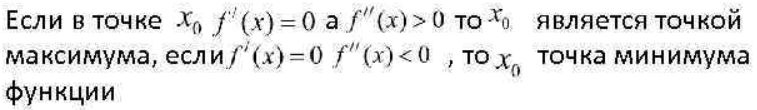

In [17]:
f = ( x*y + 2*x*z**2+ 3*y**2*z)/(x*y*z) + x+1
extremum(f)

x: [-1.56508458007329, 1.56508458007329]
y: [0.816496580927726, 0.816496580927726]
z: [-0.638943104246272, 0.638943104246272]
first point: 
maximum
second point: 
minimum
